In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
white_wines = pd.read_csv("./data/winequality-white.csv", sep=";")

In [3]:
white_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### A base não possui dados nulos ou faltantes

In [4]:
white_wines['rating'] = [0 if quality < 6 else 1 for quality in white_wines['quality']]
white_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


Text(0.5, 1.0, 'Quantidade de Vinhos Ruins/Bons')

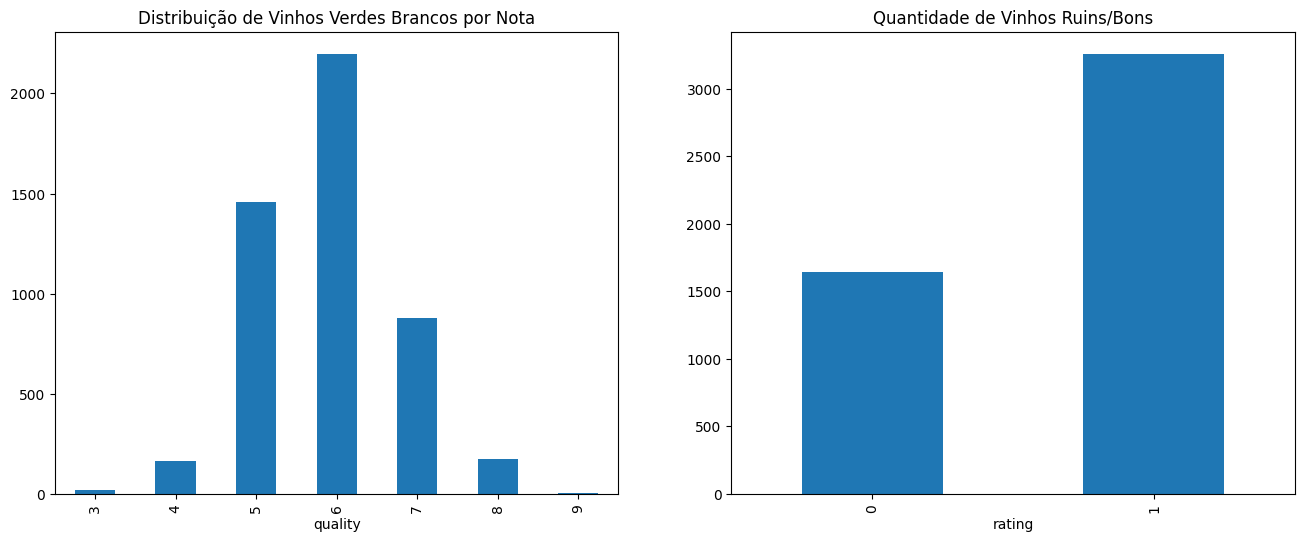

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
ax = plt.subplot(121)
white_wines.quality.value_counts().sort_index(ascending=True).plot.bar()
ax.set_title("Distribuição de Vinhos Verdes Brancos por Nota")
ax = plt.subplot(122)
white_wines.rating.value_counts().sort_index(ascending=True).plot.bar()
ax.set_title("Quantidade de Vinhos Ruins/Bons")


In [6]:
white_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.000000


<table>
  <thead>
    <tr>
      <th>Variável</th>
      <th>Tipo</th>
      <th>Valor Médio</th>
      <th>Desvio Padrão</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>fixed acidity</td>
      <td>Contínua</td>
      <td>6.854788</td>
      <td>0.843868</td>
    </tr>
    <tr>
      <td>volatile acidity</td>
      <td>Contínua</td>
      <td>0.278241</td>
      <td>0.100795</td>
    </tr>
    <tr>
      <td>citric acid</td>
      <td>Contínua</td>
      <td>0.334192</td>
      <td>0.121020</td>
    </tr>
    <tr>
      <td>residual sugar</td>
      <td>Contínua</td>
      <td>6.391415</td>
      <td>5.072058</td>
    </tr>
    <tr>
      <td>chlorides</td>
      <td>Contínua</td>
      <td>0.045772</td>
      <td>0.021848</td>
    </tr>
    <tr>
      <td>free sulfur dioxide</td>
      <td>Contínua</td>
      <td>35.308085</td>
      <td>17.007137</td>
    </tr>
    <tr>
      <td>total sulfur dioxide</td>
      <td>Contínua</td>
      <td>138.360657</td>
      <td>42.498065</td>
    </tr>
    <tr>
      <td>density</td>
      <td>Contínua</td>
      <td>0.994027</td>
      <td>0.002991</td>
    </tr>
    <tr>
      <td>pH</td>
      <td>Contínua</td>
      <td>3.188267</td>
      <td>0.151001</td>
    </tr>
    <tr>
      <td>sulphates</td>
      <td>Contínua</td>
      <td>0.489847</td>
      <td>0.114126</td>
    </tr>
    <tr>
      <td>alcohol</td>
      <td>Contínua</td>
      <td>10.514267</td>
      <td>1.230621</td>
    </tr>
    <tr>
      <td>quality</td>
      <td>Categórica</td>
      <td>---</td>
      <td>---</td>
    </tr>
    <tr>
      <td>rating</td>
      <td>Categórica</td>
      <td>---</td>
      <td>---</td>
    </tr>
  </tbody>
</table>

In [7]:
features = white_wines.columns.drop(labels=['quality', 'rating'])
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

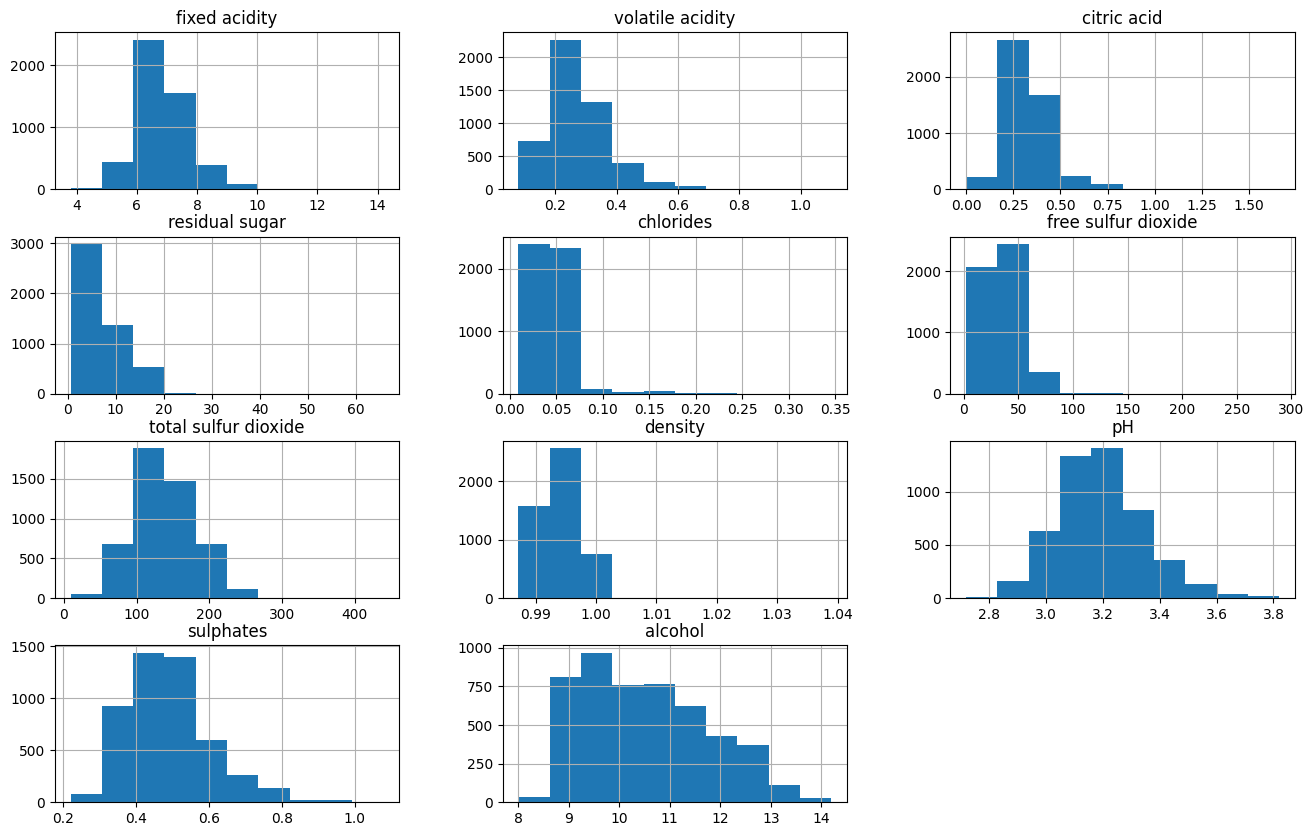

In [8]:
_ = white_wines[features].hist(figsize=(16, 10))

In [9]:
X = white_wines[features]
y = white_wines['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(50,30),
                    activation="tanh",
                    solver='adam',
                    max_iter=10000,
                    alpha=0.05,
                    learning_rate='adaptive')

In [11]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50, 30),
              learning_rate='adaptive', max_iter=10000)

In [12]:
y_pred = mlp.predict(X_test_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.81


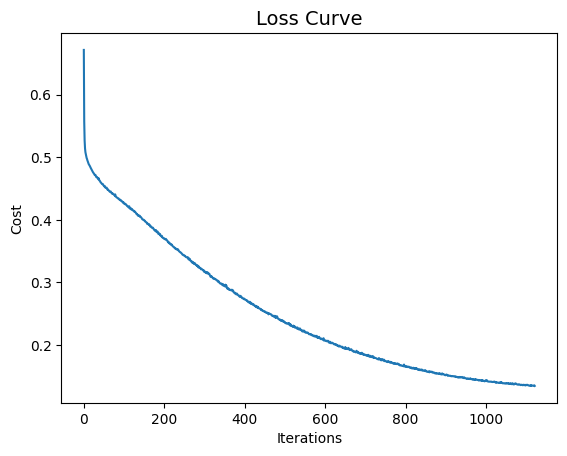

In [13]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Confusion matrix:
[[237  91]
 [ 95 557]]


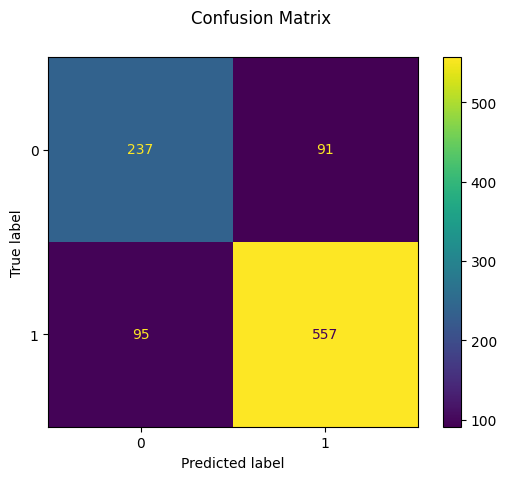

In [14]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, mlp.predict(X_test_scaled))
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       328
           1       0.86      0.85      0.86       652

    accuracy                           0.81       980
   macro avg       0.79      0.79      0.79       980
weighted avg       0.81      0.81      0.81       980



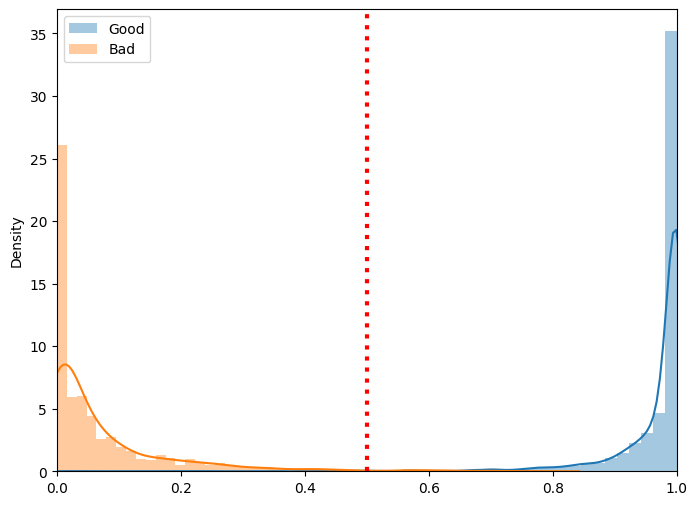

In [36]:
y_hat = mlp.predict_proba(X_train_scaled)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.distplot(y_hat[y_train.values == 1, 1], label="Good", ax=ax)
ax.set_xlim([0, 1])
sns.distplot(y_hat[y_train == 0, 1], label="Bad", ax=ax)
ax.legend();
ax.axvline(0.5, color="red", ls=":", lw=3)